# Classification Trees

Vanessa Mendivil Maza

In [1]:
#Bibliotecas para tratamiento y Visualización de Datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Biblioteca para el Machine Lesarning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Librería de árboles de decisiones
from sklearn.tree import DecisionTreeClassifier

#Bibliotecas para medidas del desempeño
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
!pip install plot_confusion_matrix
import plot_confusion_matrix

In [3]:
#Abriendo base de datos
#IMPORTANTE: Para utilizar las técnicas de clasificación de la librería sklearn es necesario que todas las variables independientes estén codificadas como números

path ="C:/Users/Vane/Documents/Portafolio/decisiontree_andares_db.xlsx"
dataa = pd.read_excel(path)
dataa

,ID,F1,P1_1,P1_2,P1_3,P1_4,P1_5,P1_6,P1_7,P1_8,...,P6_1_1_1,P6_1_2_1,P6_1_3_1,P6_1_4_1,P7,P8,P9,D1,D2,D3
0,1,Menos de un mes,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,2000.0,200.0,0.0,160.0,Totalmente satisfecho,Muy probablemente sí,Definitivamente sí lo recomendaría,Femenino,28.0,Empleado
1,2,Menos de un mes,4.0,3.0,5.0,3.0,4.0,4.0,4.0,5.0,...,2000.0,200.0,0.0,250.0,Totalmente satisfecho,Muy probablemente sí,Definitivamente sí lo recomendaría,Femenino,49.0,Empleado
2,3,Menos de una semana,4.0,3.0,5.0,4.0,4.0,4.0,4.0,5.0,...,2500.0,200.0,0.0,250.0,Totalmente satisfecho,Muy probablemente sí,Definitivamente sí lo recomendaría,Femenino,49.0,Empleado
3,4,Menos de una semana,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,...,0.0,0.0,0.0,0.0,Totalmente satisfecho,Muy probablemente sí,Definitivamente sí lo recomendaría,Femenino,25.0,Empleado
4,5,Menos de una semana,4.0,4.0,5.0,5.0,3.0,3.0,3.0,4.0,...,250.0,50.0,100.0,250.0,Totalmente satisfecho,Muy probablemente sí,Definitivamente sí lo recomendaría,Femenino,17.0,Estudiante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,487,Menos de una semana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,488,Menos de una semana,4.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,489,Menos de una semana,3.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
489,490,Menos de una semana,4.0,3.0,4.0,5.0,4.0,5.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Debido a que algunas de nuestras variables no estan convertidas a numericas,
#vamos aconvertir esta vaiables en dummies y tomaremos solo la variable de las personas que si
#recomendarian asissitr a la plaza para que sea nuestra variable dependiente.
data = pd.get_dummies(dataa, columns=['F1','P7', 'P9', 'D1', 'D3', 'P8'])
data

,ID,P1_1,P1_2,P1_3,P1_4,P1_5,P1_6,P1_7,P1_8,P1_9,...,P9_Definitivamente sí lo recomendaría,P9_No lo recomendaría,D1_Femenino,D1_Masculino,D3_Empleado,D3_Estudiante,D3_Jubilado,D3_Trabajador independiente,P8_Muy probablemente sí,P8_No es seguro
0,1,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,...,True,False,True,False,True,False,False,False,True,False
1,2,4.0,3.0,5.0,3.0,4.0,4.0,4.0,5.0,1.0,...,True,False,True,False,True,False,False,False,True,False
2,3,4.0,3.0,5.0,4.0,4.0,4.0,4.0,5.0,3.0,...,True,False,True,False,True,False,False,False,True,False
3,4,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,...,True,False,True,False,True,False,False,False,True,False
4,5,4.0,4.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
487,488,4.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,...,False,False,False,False,False,False,False,False,False,False
488,489,3.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False
489,490,4.0,3.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Convert boolean columns to integers
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

In [6]:
# Calculamos las probabilidades a priori de que las personas si recomienden ir a andares.
#El 1 son todas las personas que si lo reocmendarian mientras que el 0 es todas las personas que no lo recomendarian.
data['P9_Definitivamente sí lo recomendaría'].value_counts()

P9_Definitivamente sí lo recomendaría
1    246
0    245
Name: count, dtype: int64

In [7]:
#Creamos nuestro vector de etiquetas para usarlas en la matriz de confusion y el arbol
#este código está extrayendo y explorando las etiquetas asociadas con esa variable, aunque ya las habiamos convertido a dummies.

y = data["P9_Definitivamente sí lo recomendaría"]
y[0:2]
print('Clases:\n', y)


Clases:
 0      1
1      1
2      1
3      1
4      1
      ..
486    0
487    0
488    0
489    0
490    1
Name: P9_Definitivamente sí lo recomendaría, Length: 491, dtype: int32


In [8]:
#Creamos nuestro vector de variables independientes para que en el nodo padre
#especifique cuales etiquetas tomar para las variables,
#Cada fila es una entrada en tus datos y cada columna es una característica específica,
#con este codigo nos aseguramos de que estamos listos para entrar en nuestro arbol de decision.
x = data[['D1_Femenino', 'D1_Masculino', 'D3_Empleado', 'D3_Estudiante', 'D3_Jubilado', 'D3_Trabajador independiente']].values
x[0:6]
print('Características:\n', x)


Características:
 [[1 0 1 0 0 0]
 [1 0 1 0 0 0]
 [1 0 1 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [9]:
#Separando las variables independientes, selecciona todas menos la ultima que es la dependiente.
#esto es una interpretacion de nuestros datos que utilizaremos para la construccion de nuestro arbol de decisiones.
data_x = data.iloc[:,0:data.columns.size-1].values
data_x

array([[1, 5.0, 5.0, ..., 0, 0, 1],
       [2, 4.0, 3.0, ..., 0, 0, 1],
       [3, 4.0, 3.0, ..., 0, 0, 1],
       ...,
       [489, 3.0, 4.0, ..., 0, 0, 0],
       [490, 4.0, 3.0, ..., 0, 0, 0],
       [491, 4.0, 2.0, ..., 0, 0, 1]], dtype=object)

In [10]:
#Separando la variable dependiente
#Hacemos el mismo proceso que con las variables indepientes pero con nuestra variable dependiente.
data_y = data.iloc[:,data.columns.size-1].values
data_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

In [11]:
#Partición de la muestra en Train y Test
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.30, random_state = 363)
print(train_x)

[[37 3.0 3.0 ... 0 0 1]
 [311 4.0 4.0 ... 0 0 1]
 [127 3.0 3.0 ... 0 0 1]
 ...
 [313 4.0 4.0 ... 0 0 0]
 [399 4.0 3.0 ... 0 0 0]
 [430 nan nan ... 0 0 0]]


In [12]:
#Empezamos a modelar nuestro árbol de decisiones con un criterio llamado entropía, este nos
#Entregará la ganancia de información que nos ayudará a mirar si construimos bien nuestro árbol porque mide las impurezas
arbol = DecisionTreeClassifier (criterion="entropy", max_depth = 4) #Número máximo de nódulos en el árbol


In [13]:
#Como no corrio nuestro arbol de decision, creemos que lo mejor es buscar que tipo de objeto tene,os.
print(train_x.dtype)
print(train_y.dtype)


object
int32


In [14]:
# Identifying numeric and categorical columns
numeric_columns = np.where(np.array([np.issubdtype(dt, np.number) for dt in data.dtypes]))[0]
categorical_columns = np.where(np.array([pd.api.types.is_string_dtype(dt) for dt in data.dtypes]))[0]

print("Numeric Columns:")
print(numeric_columns)

print("Categorical Columns:")
print(categorical_columns)

# Print the first few rows of the training set for inspection
print("First 5 rows of train_x:")
print(train_x[:5])

print("First 5 rows of train_y:")
print(train_y[:5])

Numeric Columns:
[ 0  1  2  3  4  5  6  7  8  9 10 22 23 24 25 26 27 28 29 30 31 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]
Categorical Columns:
[11 12 13 14 15 16 17 18 19 20 21 32]
First 5 rows of train_x:
[[37 3.0 3.0 5.0 4.0 4.0 5.0 3.0 4.0 4.0 4.0 'Sí' 'Sí' 'No' 'Sí' 'No'
  'No' 'No' 'No' 'No' 'No' 'Sí' 5.0 4.0 5.0 5.0 4.0 5.0 4.0 5.0 5.0 5.0
  'Sí' 500.0 500.0 300.0 500.0 22.0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1]
 [311 4.0 4.0 5.0 5.0 3.0 3.0 1.0 5.0 3.0 5.0 'Sí' 'Sí' 'Sí' 'No' 'No'
  'No' 'No' 'No' 'No' 'No' 'Sí' 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 5.0
  'No' 0.0 0.0 0.0 0.0 23.0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1]
 [127 3.0 3.0 4.0 4.0 1.0 1.0 1.0 3.0 3.0 4.0 'Sí' 'Sí' 'No' 'Sí' 'No'
  'No' 'No' 'No' 'No' 'No' 'Sí' 5.0 5.0 5.0 5.0 4.0 4.0 4.0 4.0 4.0 5.0
  'Sí' 400.0 30.0 0.0 0.0 22.0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1]
 [81 4.0 4.0 5.0 4.0 2.0 3.0 3.0 5.0 3.0 5.0 'Sí' 'Sí' 'No' 'No' 'No'
  'No' 'Sí' 'No' 'No' 'No' 'Sí' 5.0 4.0 5.0 5.0 3.0 3.0 3.0 3.0 5.

In [15]:
#Tendremos que estandarizar las variables para obtener nuestro arbol de decision,
#esto porque nuestro arbol no funcionaba porque nuestras variables no estaban como numericas, entonces convertimos test y train.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Identifica las columnas numéricas y categóricas
numeric_columns = np.where(np.issubdtype(train_x.dtype, np.number))[0]
categorical_columns = [0]  # En este caso, solo hay una columna categórica

# Crea el transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Aplica el transformador al conjunto de entrenamiento
train_x1 = preprocessor.fit_transform(train_x)

# Aplica el mismo transformador al conjunto de prueba
test_x1 = preprocessor.transform(test_x)




In [16]:
#Ahora ajustamos nuestro modelo usando los datos de entrenamiento
# Ahora ajustamos nuestro modelo usando los datos de entrenamiento preprocesados
arbol.fit(train_x1, train_y)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
#Comenzamos a hacer la predicción y la guardamos en y_pred
y_pred = arbol.predict(test_x1)

In [18]:
#Comparamos los valores reales con los pronosticados por el modelo, nuestro modelo nos esta dando los mismos resultados en train y test por lo que podemos pensar que es un buen modelo.
print ('Predicción del modelo: ',y_pred [0:5])
print ('Valores reales\n',test_y [0:5])


Predicción del modelo:  [0 0 0 0 0]
Valores reales
 [0 0 0 0 0]


In [19]:
# Matriz de confusión
cm = confusion_matrix(test_y, y_pred)
cm

array([[112,   0],
       [ 36,   0]], dtype=int64)

esto quiere decir que nuestro modelo ha predecido bien 112 estancias mientras que ha fallado en 36 pero al ver que no tenemos ninguna prediccion en nuestra otra columna podemos ver un desequilibrio en el modelo.

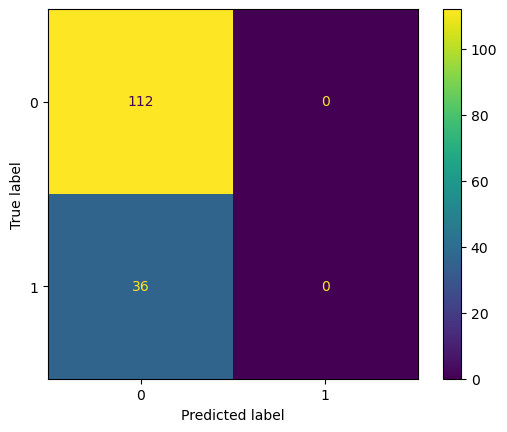

In [20]:
# Visualizando la Matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=arbol.classes_)
disp.plot()
plt.show()

En este caso, la clase "Definitivamente sí lo recomendaría" (1) no ha sido predicha por el modelo en ningun caso, lo que se refleja en los valores 0 en la segunda columna. La clase "No lo recomendaría" (0) se predijo correctamente en 112 instancias y se predijo incorrectamente en 36 instancias. Esto nos indica que tenemos un modelo poco exacto por la division de dummies que hicimos.

In [21]:
#Evaluamos nuestro modelo y observamos el porcentaje de clasificaciones correctas
print("Precisión del Árbol de Clasificación: ", accuracy_score(test_y, y_pred))


Precisión del Árbol de Clasificación:  0.7567567567567568


Nuestro modelo tiene una precision del 75 en sus predicciones por lo que podemos decir que nuestro modelo tiene un desempeno entre regular y malo.

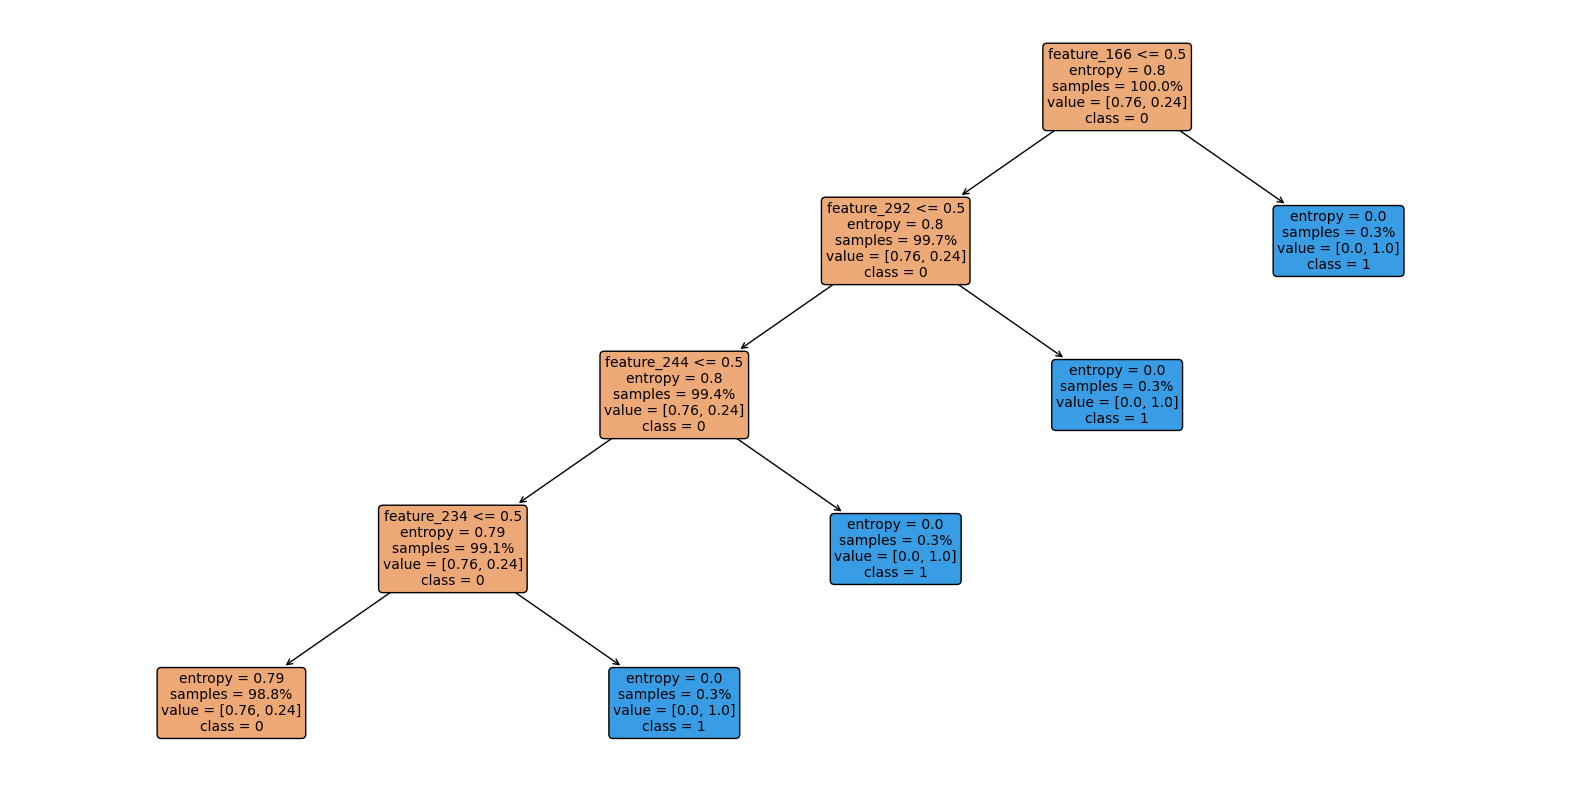

In [31]:
# Ensure the tree is trained properly before visualizing
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=4)
arbol.fit(train_x1, train_y)

# Convert unique labels to string
class_names_str = list(map(str, np.unique(train_y)))

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(arbol, 
          feature_names=[f"feature_{i}" for i in range(train_x1.shape[1])],
          class_names=class_names_str, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2,
          fontsize=10)

plt.show()


Nuestras entropias nos muestran muchas impurezas en los nodos pues el menor valor es de ,788 con las (343-339) observaciones en el modelo.
Nuestros valores nos muestras la distribucion entre las clases de 0 y 1 mientras que class nos dice que mientras la condicion de x sea verdadera se va a predecir como resultado la clase 0.

En conclusion nuestro arbol de decisiones en muy pobre y tiene una muy baja tasa de acertacion en sus predicciones, supongo que es por el tratamiento de las variables y el error esta desde arriba por la conversion a dummies.

Como recomendaciones podemos concluir que es necesario encontrar mejores maneras para clasificar las variables de forma distinta y obtener un modelo con una mejor precision.